In [1]:
import pandas as pd
import numpy as np

In [6]:
import numpy as np
import pandas as pd

np.random.seed(23)

# ----- CLASS 1 -----
mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])

class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
df1 = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 1     # <-- label for class 1


# ----- CLASS 2 -----
mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])

class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)
df2 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df2['target'] = 0     # <-- label for class 2


# ----- COMBINE BOTH -----
df = pd.concat([df1, df2], ignore_index=True)

print(df.shape)
df.head()


(40, 4)


,feature1,feature2,feature3,target
0,0.666988,0.025813,-0.777619,1
1,0.948634,0.701672,-1.051082,1
2,-0.367548,-1.137460,-1.322148,1
3,1.772258,-0.347459,0.670140,1
4,0.322272,0.060343,-1.043450,1


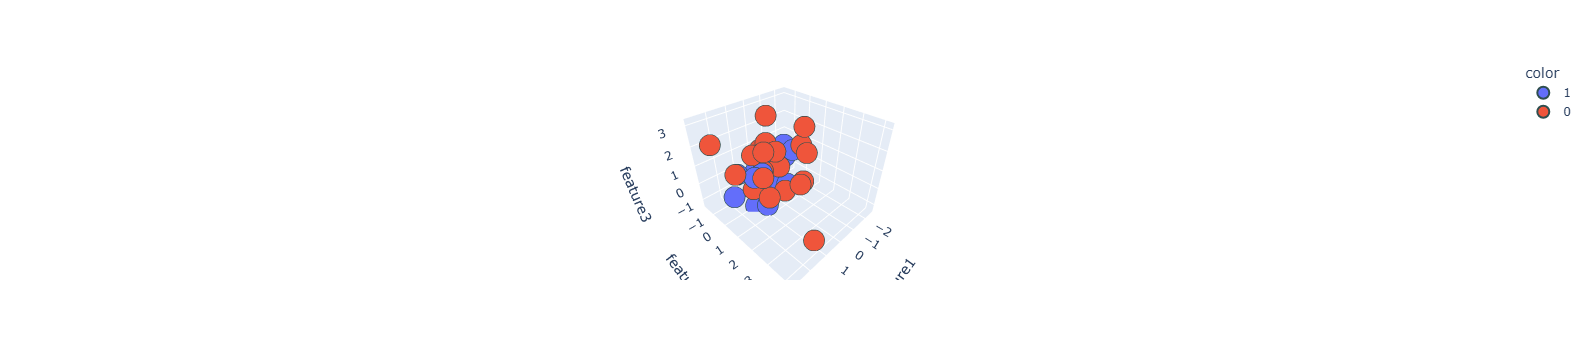

In [8]:
# Visualizing in 3-D plot
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df , x=df['feature1'] , y=df['feature2'] , z = df['feature3'],
                   color = df['target'].astype('str'))

fig.update_traces(marker=dict(size=12 , line = dict(width = 2 , color = 'DarkSlateGrey')),
                 selector = dict(mode = 'markers'))

fig.show()


In [11]:
# Converting  into 2-D 
# step1 = Apply standard scaling  (mean centering)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df.iloc[:, 0:3] = scaler.fit_transform(df.iloc[:, 0:3])


In [14]:
# Step2 - Finding Covariance matrix
covariance_matrix = np.cov([df.iloc[:,0] , df.iloc[:,1] , df.iloc[: ,2]])
print("Covariance matrix : \n",covariance_matrix)

Covariance matrix : 
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [15]:
eigen_value , eigen_vectors = np.linalg.eig(covariance_matrix)

In [17]:
eigen_value

array([1.3536065 , 0.94557084, 0.77774573])

In [18]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

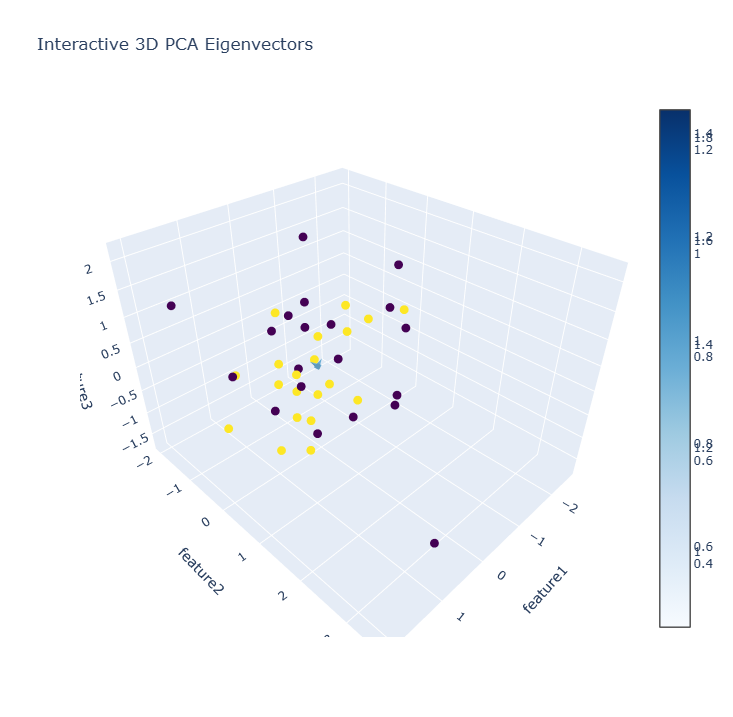

In [24]:
import plotly.graph_objects as go
import numpy as np

# Covariance matrix & eigenvectors
cov_matrix = np.cov([df['feature1'], df['feature2'], df['feature3']])
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

fig = go.Figure()

# Data points
fig.add_trace(go.Scatter3d(
    x=df['feature1'], y=df['feature2'], z=df['feature3'],
    mode='markers',
    marker=dict(size=5, color=df['target'], colorscale='Viridis'),
    name='Data Points'
))

# Eigenvector arrows
origin = [df['feature1'].mean(), df['feature2'].mean(), df['feature3'].mean()]

for i in range(3):
    fig.add_trace(go.Cone(
        x=[origin[0]],
        y=[origin[1]],
        z=[origin[2]],
        u=[eigen_vectors[0, i] * eigen_values[i]],
        v=[eigen_vectors[1, i] * eigen_values[i]],
        w=[eigen_vectors[2, i] * eigen_values[i]],
        sizemode="absolute",
        sizeref=0.2,
        colorscale="Blues",
        name=f"Eigenvector {i+1}"
    ))

fig.update_layout(
    width=900, height=700,
    scene=dict(
        xaxis_title="feature1",
        yaxis_title="feature2",
        zaxis_title="feature3"
    ),
    title="Interactive 3D PCA Eigenvectors"
)

fig.show()


In [27]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [28]:

transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,-0.429384,0.829265,1
1,-1.124520,0.842226,1
2,0.599433,1.795862,1
3,-0.094556,-0.761566,1
4,-0.401542,1.203061,1


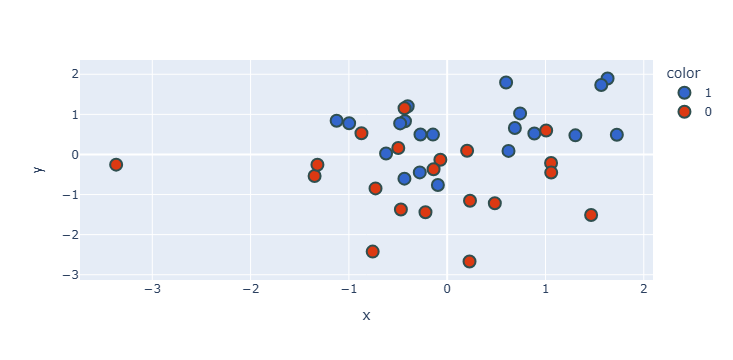

In [29]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()